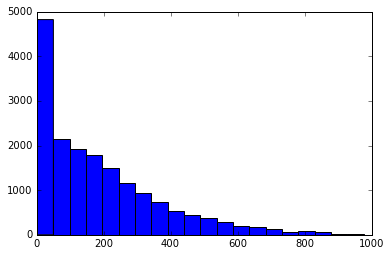

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
12945,12946,2012-06-28,3,1,6,14,0,4,1,1,0.86,0.7273,0.25,0.3284,66,188,254,2
8374,8375,2011-12-20,4,0,12,14,0,2,1,2,0.44,0.4394,0.58,0.1045,11,127,138,2
4562,4563,2011-07-14,3,0,7,0,0,4,1,1,0.66,0.6212,0.69,0.2985,14,32,46,4
5008,5009,2011-08-01,3,0,8,14,0,1,1,1,0.92,0.8182,0.29,0.1940,37,86,123,2
11644,11645,2012-05-05,2,1,5,9,0,6,0,1,0.62,0.5909,0.78,0.1045,61,223,284,1


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

bike_rentals = pd.read_csv('hour.csv')
#print(bike_rentals.head())
plt.hist(bike_rentals.cnt,bins = 20)
plt.show()

print(bike_rentals.corr().cnt)

def assign_label(row):
    hour = row['hr']
    
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3
    
bike_rentals['time_label'] = bike_rentals.apply(assign_label, axis = 1)
#print(bike_rentals.head(20))
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
train.head()

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

predictors = list(train.columns)
predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")
predictors.remove("instant")

model = LinearRegression()
model.fit(train[predictors],train['cnt'])
prediction = model.predict(test[predictors])

#use mean square error as the metrics
error = np.mean((prediction-test['cnt'])**2)
error

17049.962017214566

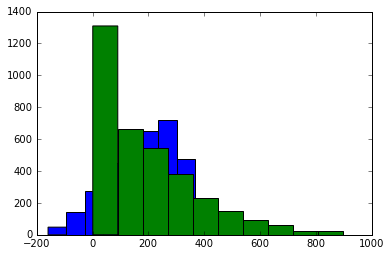

In [28]:
plt.hist(prediction)
plt.hist(test['cnt'])
plt.show()
# the error is very high

In [49]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5,max_depth = 20)
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)


2923.9077385125897

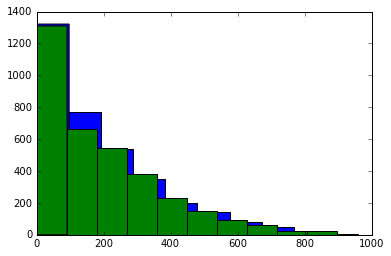

In [33]:
plt.hist(predictions)
plt.hist(test['cnt'])
plt.show()

# DecisionTree gives a much better prediction

In [50]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [53]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)



2225.662075893779

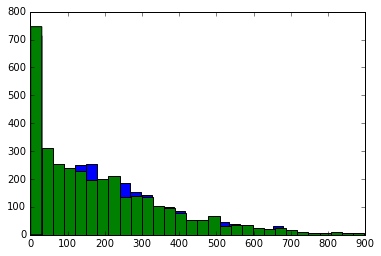

In [55]:
plt.hist(predictions,bins = 30)
plt.hist(test['cnt'],bins=30)
plt.show()

# DecisionTree gives a much better prediction